In [1]:
from utils import *
from modeling import *
from plotting import *

%load_ext autoreload
%autoreload 2

In [4]:
with fits.open("./data/coadd_SloanG_NGC_5907.fits") as hdul:
    data = hdul[0].data
    header = hdul[0].header
    wcs_data = wcs.WCS(header)
    
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5750                                                  
NAXIS2  =                 4250                                                  
CTYPE1  = 'RA---TAN'                                                            
CRPIX1  =               2875.5                                                  
CRVAL1  =              228.975                                                  
CTYPE2  = 'DEC--TAN'                                                            
CRPIX2  =               2125.5                                                  
CRVAL2  =       56.32916666667                                                  
CD1_1   =  -0.0006944444444444                                                  
CD1_2   =                  0

In [22]:
with fits.open("./data/2018-03-19-83F010826_48_light_ds_ff_wcs_sms_reg.fits") as hdul:
    data_i = hdul[0].data
    header_i = hdul[0].header
    wcs_data_i = wcs.WCS(header_i)
    
header_i

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 5750 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                 4250 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   2.289750000000E+02 / World coordinate on this axis                  
CRPIX1  =   2.875500000000E+03 / Reference pixel on this axis                   
CD1_1   =  -6.944444444444E-

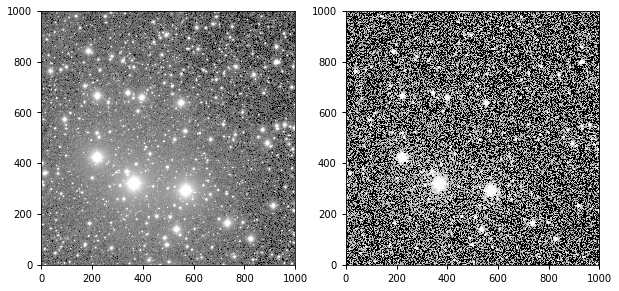

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(data[1400:2400, 3100:4100], vmin=457, vmax=457+200, norm=norm1, cmap="gray")
ax2.imshow(data_i[1400:2400, 3100:4100], vmin=0, vmax=200, norm=norm2, cmap="gray")

Results will be saved in ./Frame

Measure the intensity at R = 12 for stars < 15.0 as normalization of fitting

BKG / ZP / PIXSCALE missing in header --->


Input a value of ZP : 27.1
Manually set a value of background : 458


Match field [700, 700, 5050, 3550] with catalog

Measure Sky Patch (X min, Y min, X max, Y max) :
[3100, 1400, 4100, 2400]


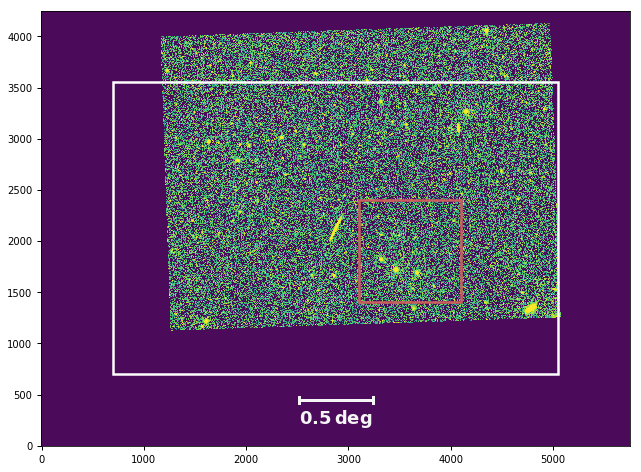

Search 1.806 deg around:
<SkyCoord (ICRS): (ra, dec) in deg
    (228.97437372, 56.32951389)>
Pan-STARRS rmag:  6.675 ~ 22.998
Pan-STARRS gmag:  7.754 ~ 28.284
Matched stars with Pan-STARRS gmag:  7.754 ~ 22.508
Matched bright stars with Pan-STARRS gmag:  7.754 ~ 14.997

Average Color Term [SE-catalog] = -0.12448


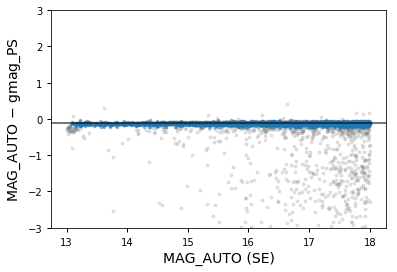

Save the PANSTARRS catalog and matched sources in ./Frame

Fit 3-order empirical relation of aperture radii for catalog stars based on SE (X2.0).


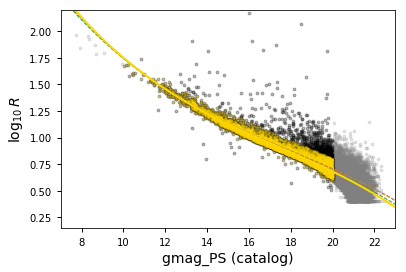


Make segmentation map based on catalog PS gmag: 6636 stars


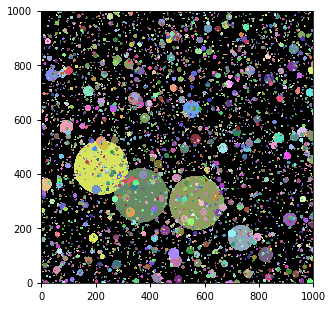

Save segmentation map made from catalog as ./Frame/Seg_PS_X3100Y1400.fits

Measure intensity at R = 12 for catalog stars gmag < 15.0 in array([3100, 1400, 4100, 2400]):
completed: 27/111
completed: 54/111
completed: 81/111
Errorenous measurement: # 19088
completed: 108/111
Save thumbs to: ./Frame/NGC5907-G-thumbnail_g15mag_X3100Y1400.pkl


In [7]:
%matplotlib inline
%run -i Measure_Rnorm_SE.py -f "g" -r 12 -m 15 -b "[3100, 1400, 4100, 2400]" -I "./data/2018-03-19-83F010826_48_light_ds_ff_wcs_sms_reg.fits" --DIR_NAME './Frame'

Results will be saved in ./Frame/NGC5907-G-R12M24pix_X3100Y1400

BKG / ZP / PIXSCALE missing in header --->


Input a value of ZP : 27.1
Manually set a value of background : 458



Surface Brightness Thresholds: array([26., 24.]) mag/arcsec^2 at 12 pix
(<=> Flux Thresholds: array([ 524689.91, 3310569.53]))

# of medium bright (flux:6.2e+05~2.8e+06) stars: 9 
# of very bright (flux>4.4e+06) stars : 5
Not many bright stars, will draw in serial.



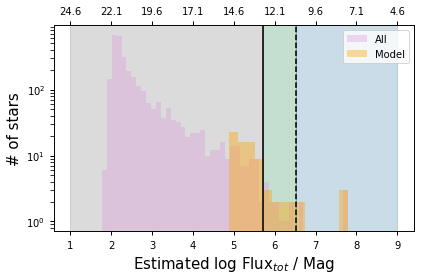

Generate base image of faint stars (flux < 5.2e+05).
Total Time: 2.523 s

Detect and deblend source... Mask S/N > 2.5 (5th enlarged)
Use mask map built from catalog
Mask core regions: r < 24 (16) pix 


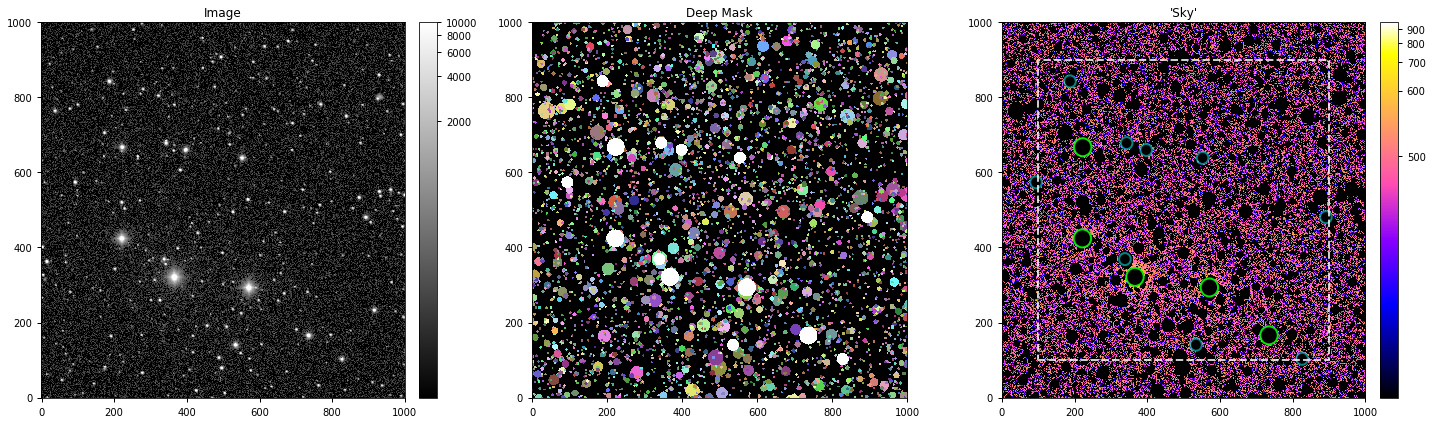

Use sky strips crossing very bright stars


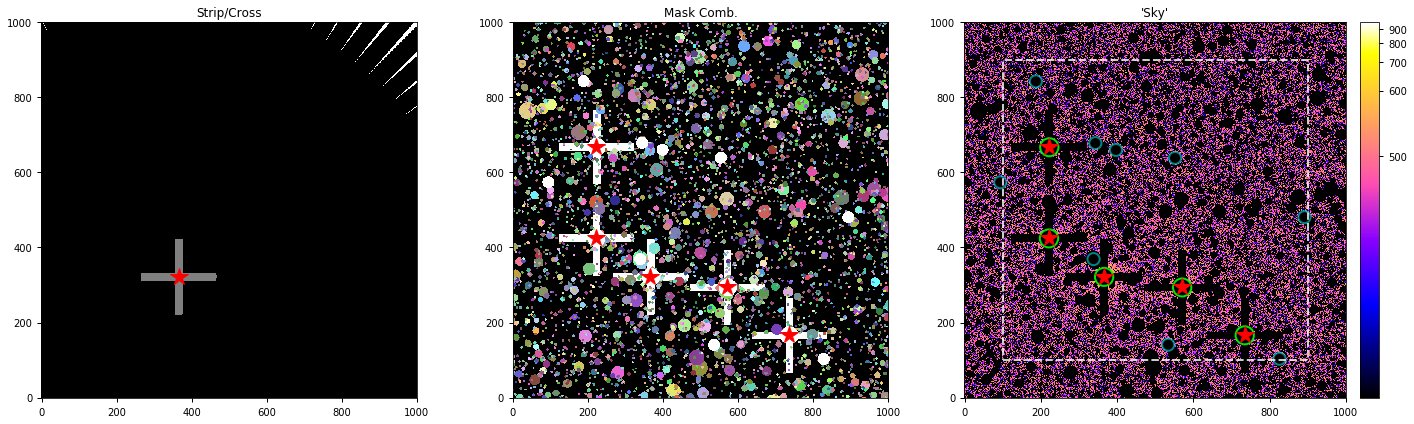

Sky Poisson Noise: nan
Estimate of Background: (461.167 +/- 38.700)

Opening new pool: # of CPU used: 2
Run Nested Fitting for the image... Dim of params: 5


iter: 1353 | batch: 2 | bound: 54 | nc: 2 | ncall: 5146 | eff(%): 26.292 | loglstar: -2207480.016 <   -inf < -2207477.379 | logz:   -inf +/-  0.865 | stop:  8.542                                    



Finish Fitting! Total time elapsed: 2.17e+03 s

Pool Closed.


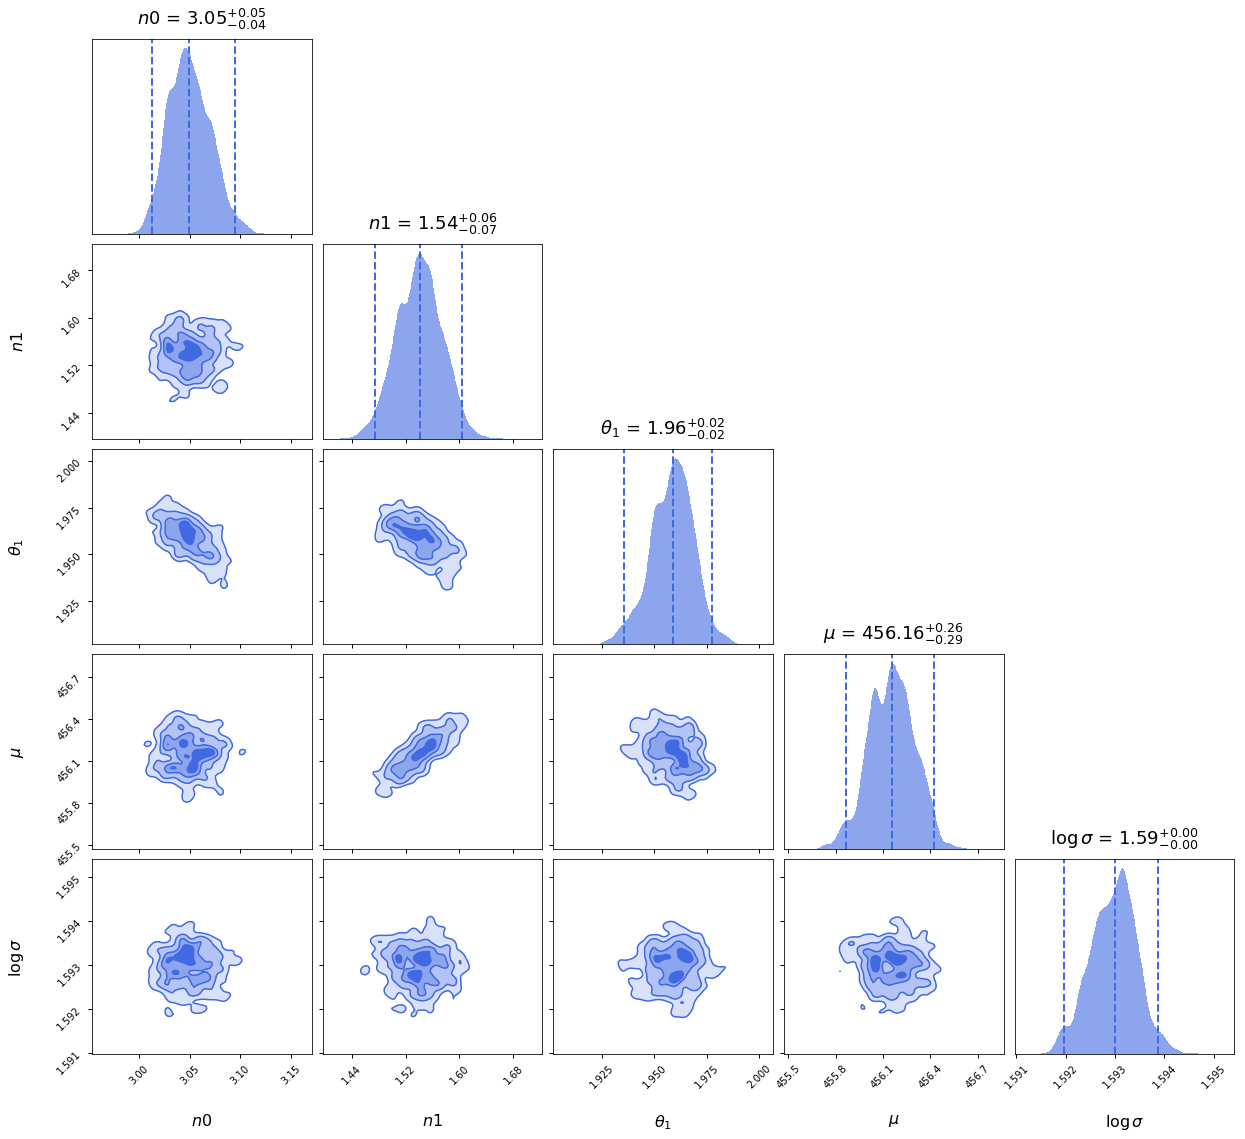

Fitting (mean) :  [  3.05    1.54    1.958 456.156   1.593]
Fitting (median) :  [  3.049   1.541   1.959 456.16    1.593]


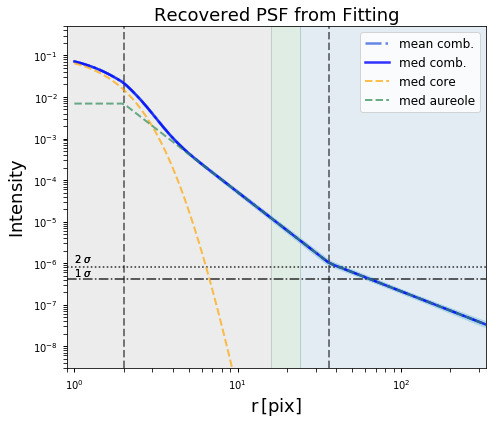

Bakground : 456.16 +/- 39.17
Reduced Chi^2: 0.99992


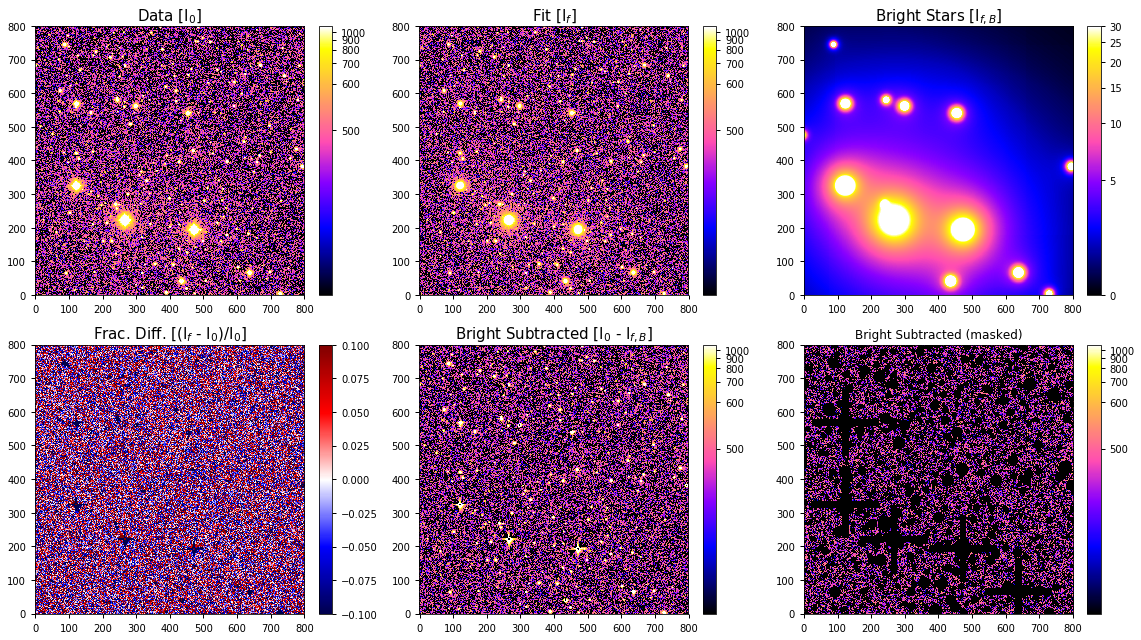

In [3]:
%matplotlib inline
%run -i Run_Fitting.py -f 'G' -n 2 -b "[3100, 1400, 4100, 2400]" -m '[13,11]' -I "./data/2018-03-19-83F010826_48_light_ds_ff_wcs_sms_reg.fits" --DIR_NAME './Frame/2018-03-19-G' --DIR_MEASURE './Frame/2018-03-19-G'

Results will be saved in ./Frame/NGC5907-G-R12M36pix_X3100Y1400

BKG / ZP / PIXSCALE missing in header --->


Input a value of ZP : 27.1
Manually set a value of background : 458



Surface Brightness Thresholds: array([26., 24.]) mag/arcsec^2 at 12 pix
(<=> Flux Thresholds: array([ 524689.91, 3310569.53]))

# of medium bright (flux:6.2e+05~2.8e+06) stars: 9 
# of very bright (flux>4.4e+06) stars : 5
Not many bright stars, will draw in serial.



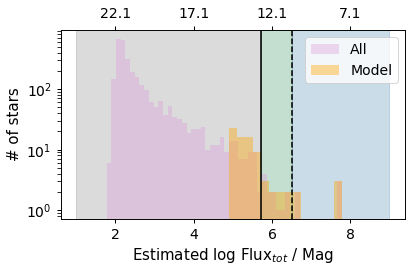

Generate base image of faint stars (flux < 5.2e+05).
Total Time: 2.455 s

Detect and deblend source... Mask S/N > 2.5 (5th enlarged)
Use mask map built from catalog
Mask core regions: r < 36 (24) pix 


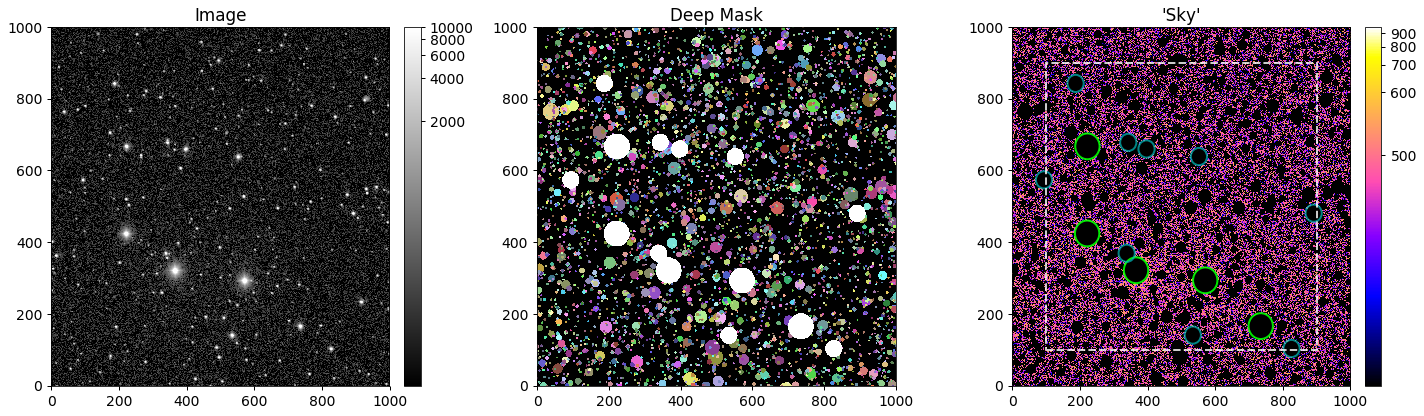

Use sky strips crossing very bright stars


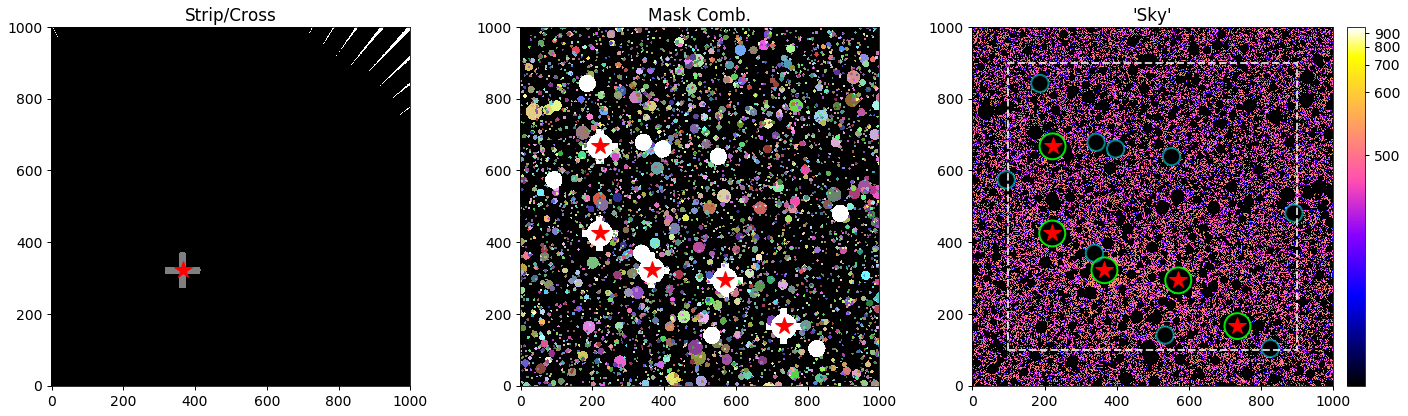

Sky Poisson Noise: 35.281
Estimate of Background: (460.812 +/- 38.545)

Opening new pool: # of CPU used: 3
Run Nested Fitting for the image... Dim of params: 5


iter: 1179 | batch: 2 | bound: 99 | nc: 1 | ncall: 8565 | eff(%): 13.765 | loglstar: -2229839.623 <   -inf < -2229837.054 | logz:   -inf +/-  0.783 | stop:  7.104                                    



Finish Fitting! Total time elapsed: 3.65e+03 s

Pool Closed.


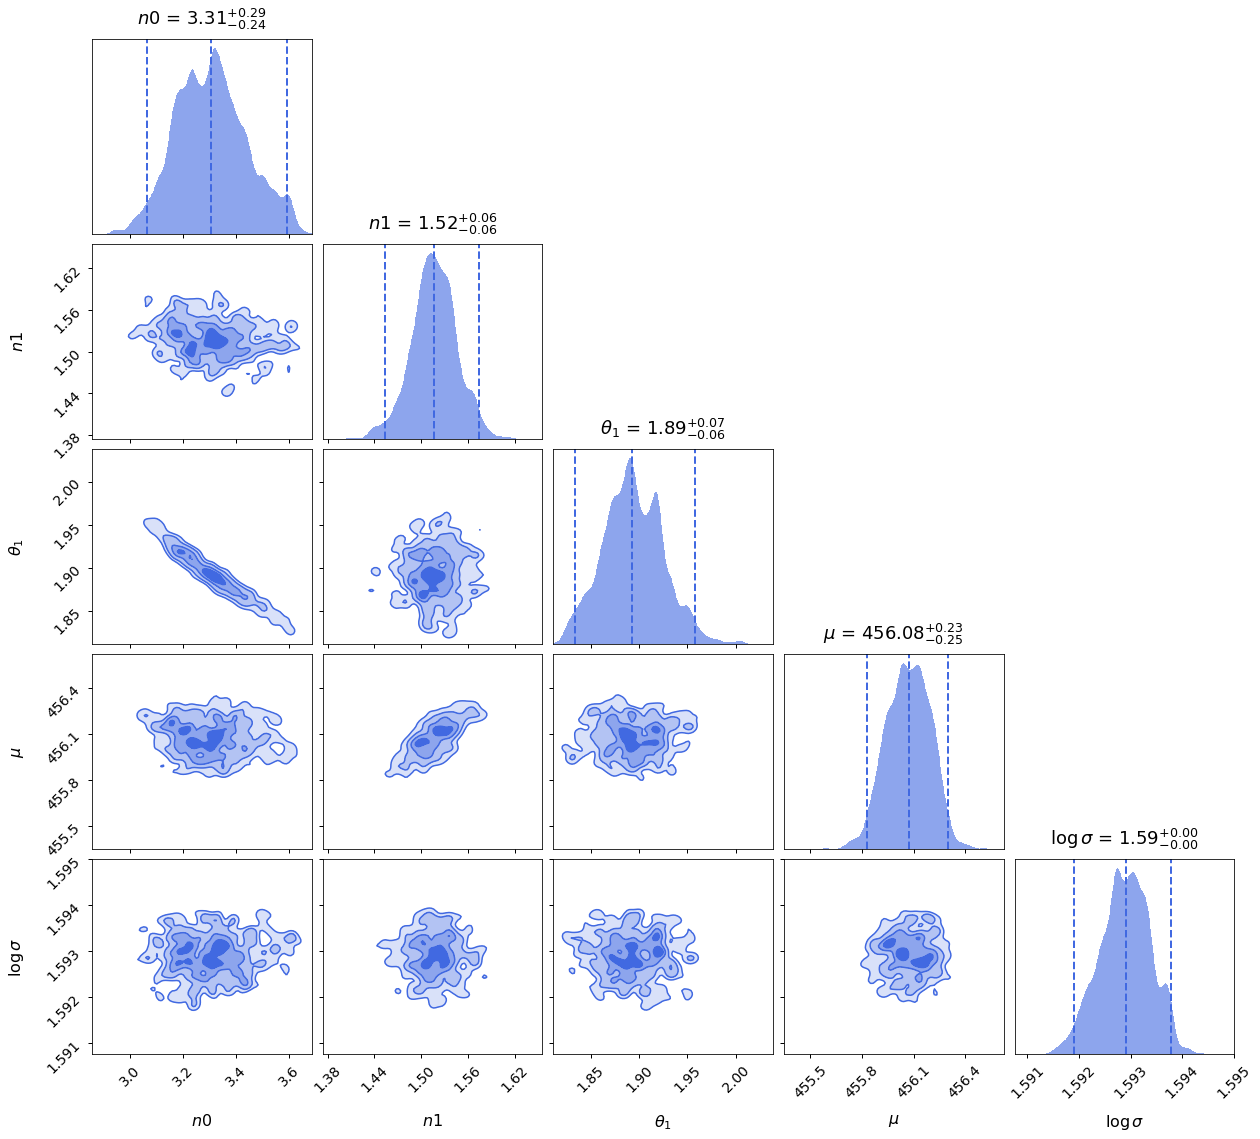

Fitting (mean) :  [  3.308   1.517   1.894 456.071   1.593]
Fitting (median) :  [  3.307   1.516   1.893 456.076   1.593]


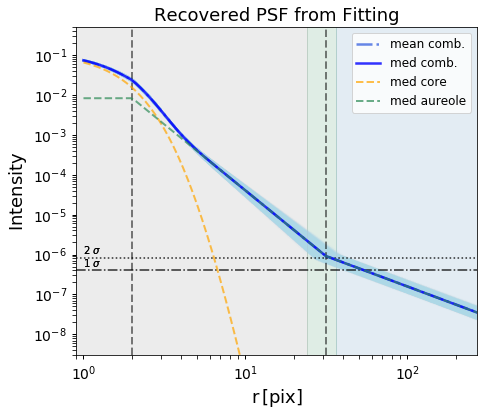

Bakground : 456.07 +/- 39.17
Reduced Chi^2: 0.99972


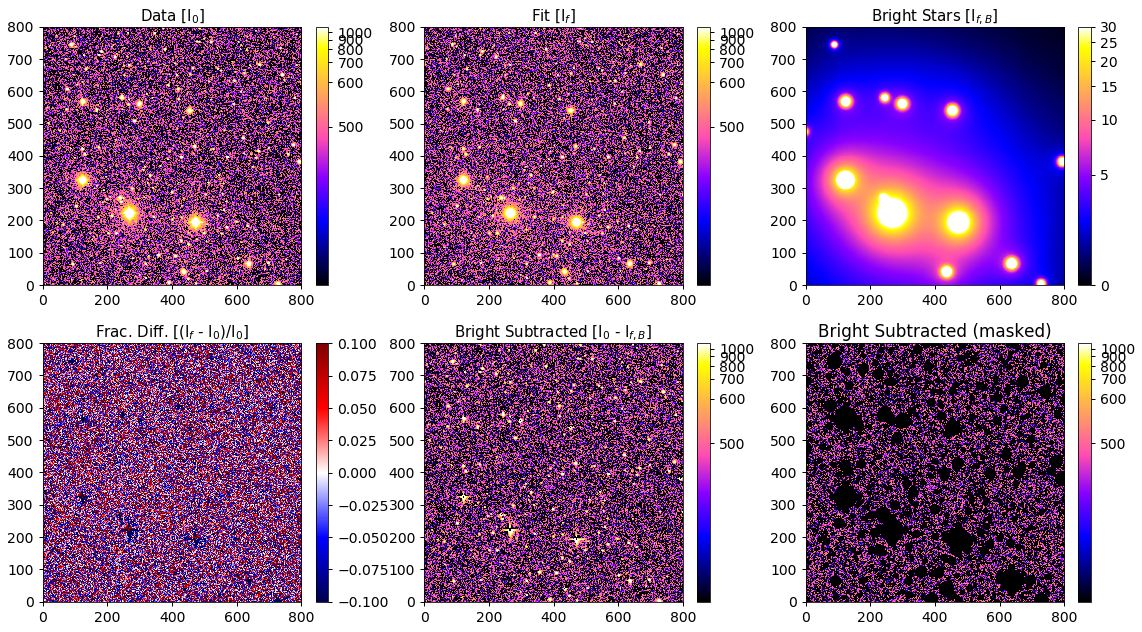

In [1]:
%matplotlib inline
%run -i Run_Fitting.py -f 'G' -n 2 -b "[3100, 1400, 4100, 2400]" -m '[13,11]' -I "./data/2018-03-19-83F010826_48_light_ds_ff_wcs_sms_reg.fits" --DIR_NAME './Frame/2018-03-19-G' --DIR_MEASURE './Frame/2018-03-19-G'

### Another Frame

In [2]:
with fits.open("./data/2018-05-16-83F010612_30_light_ds_ff_wcs_sms_reg.fits") as hdul:
    data_i = hdul[0].data
    header_i = hdul[0].header
    wcs_data_i = wcs.WCS(header_i)
    
header_i

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 5750 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                 4250 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   2.289750000000E+02 / World coordinate on this axis                  
CRPIX1  =   2.875500000000E+03 / Reference pixel on this axis                   
CD1_1   =  -6.944444444444E-

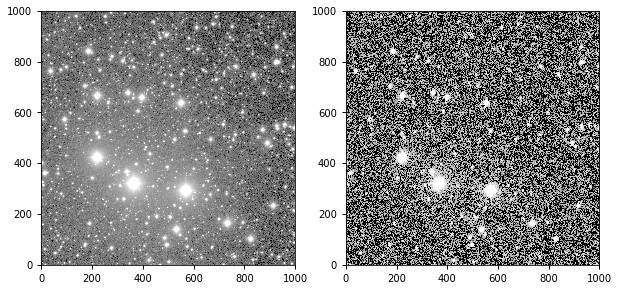

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(data[1400:2400, 3100:4100], vmin=457, vmax=457+200, norm=norm1, cmap="gray")
ax2.imshow(data_i[1400:2400, 3100:4100], vmin=0, vmax=200, norm=norm2, cmap="gray")

Results will be saved in ./Frame/2018-05-16-G

Measure the intensity at R = 12 for stars < 15.0 as normalization of fitting

BKG / ZP / PIXSCALE missing in header --->


Input a value of ZP : 27.1
Manually set a value of background : 458


Match field [700, 700, 5050, 3550] with catalog

Measure Sky Patch (X min, Y min, X max, Y max) :
[3100, 1400, 4100, 2400]


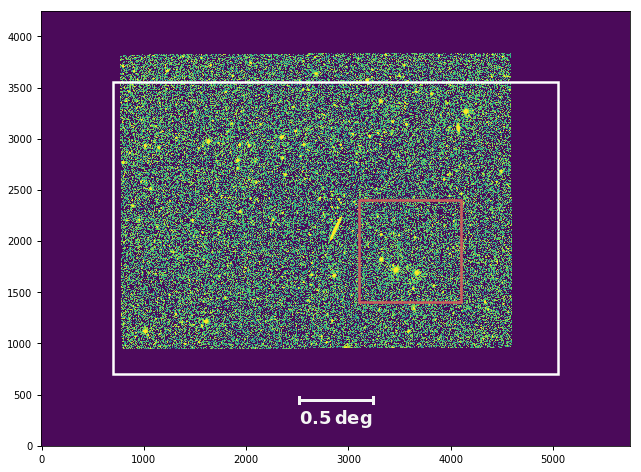

Search 1.806 deg around:
<SkyCoord (ICRS): (ra, dec) in deg
    (228.97437372, 56.32951389)>
Pan-STARRS rmag:  6.675 ~ 22.998
Pan-STARRS gmag:  7.754 ~ 28.284
Matched stars with Pan-STARRS gmag:  7.754 ~ 22.508
Matched bright stars with Pan-STARRS gmag:  7.754 ~ 14.997

Average Color Term [SE-catalog] = -0.12448


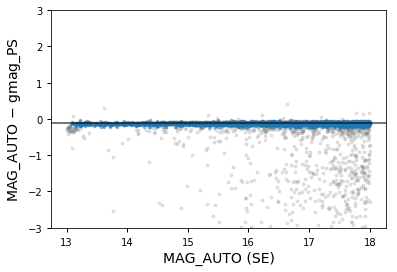

Save the PANSTARRS catalog and matched sources in ./Frame/2018-05-16-G

Fit 3-order empirical relation of aperture radii for catalog stars based on SE (X2.0).


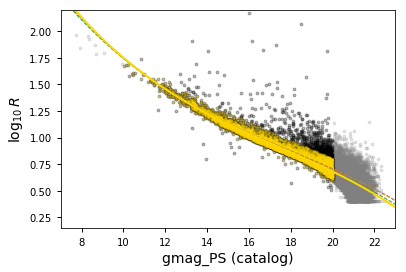


Make segmentation map based on catalog PS gmag: 6636 stars


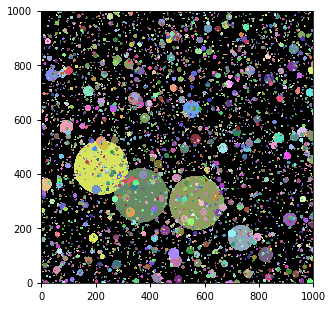

Save segmentation map made from catalog as ./Frame/2018-05-16-G/Seg_PS_X3100Y1400.fits

Measure intensity at R = 12 for catalog stars gmag < 15.0 in array([3100, 1400, 4100, 2400]):
completed: 27/111
completed: 54/111
completed: 81/111
Errorenous measurement: # 19088
completed: 108/111
Save thumbs to: ./Frame/2018-05-16-G/NGC5907-G-thumbnail_g15mag_X3100Y1400.pkl


In [7]:
%matplotlib inline
%run -i Measure_Rnorm_SE.py -f "g" -r 12 -m 15 -b "[3100, 1400, 4100, 2400]" -I "./data/2018-05-16-83F010612_30_light_ds_ff_wcs_sms_reg.fits" --DIR_NAME './Frame/2018-05-16-G'

Results will be saved in ./Frame/NGC5907-G-R12M36pix_X3100Y1400

BKG / ZP / PIXSCALE missing in header --->


Input a value of ZP : 27.1
Manually set a value of background : 458



Surface Brightness Thresholds: array([26., 24.]) mag/arcsec^2 at 12 pix
(<=> Flux Thresholds: array([ 524689.91, 3310569.53]))

# of medium bright (flux:6.2e+05~2.8e+06) stars: 9 
# of very bright (flux>4.4e+06) stars : 5
Not many bright stars, will draw in serial.



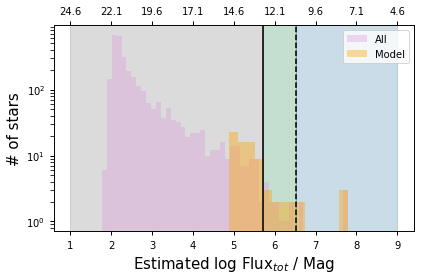

Generate base image of faint stars (flux < 5.2e+05).
Total Time: 2.420 s

Detect and deblend source... Mask S/N > 2.5 (5th enlarged)
Use mask map built from catalog
Mask core regions: r < 36 (24) pix 


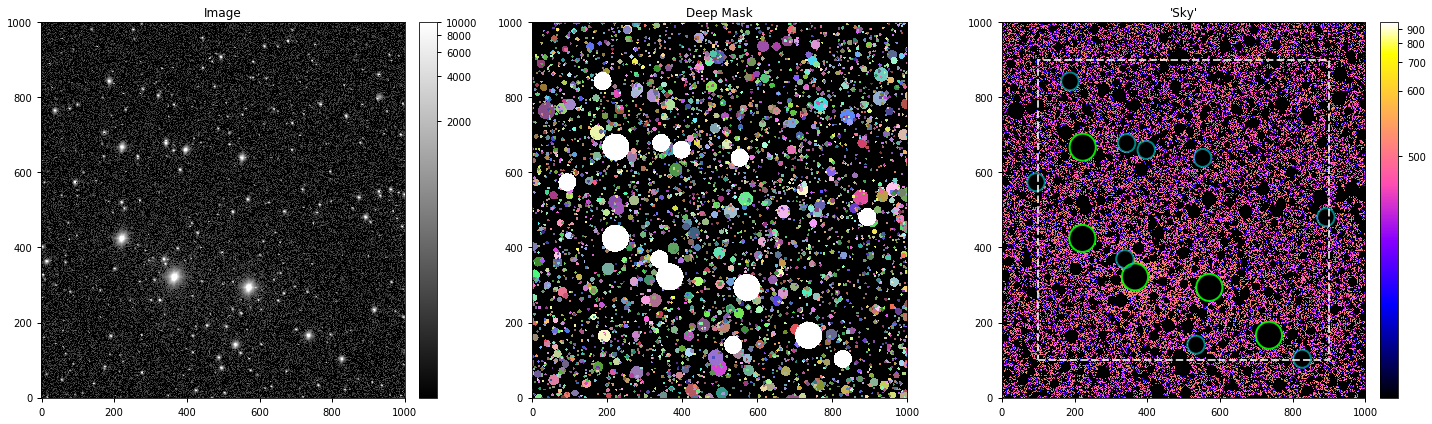

Use sky strips crossing very bright stars


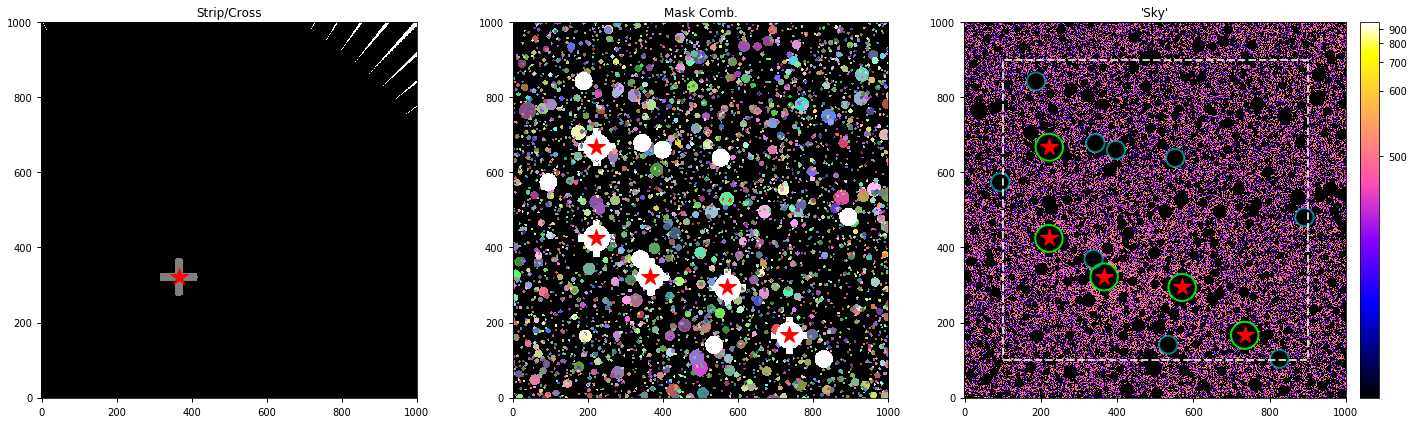

Sky Poisson Noise: 35.297
Estimate of Background: (461.273 +/- 36.672)

Opening new pool: # of CPU used: 3
Run Nested Fitting for the image... Dim of params: 5


iter: 1320 | batch: 2 | bound: 59 | nc: 1 | ncall: 5593 | eff(%): 23.601 | loglstar: -2208118.248 <   -inf < -2208115.088 | logz:   -inf +/-  0.848 | stop:  6.131                                    



Finish Fitting! Total time elapsed: 2.48e+03 s

Pool Closed.


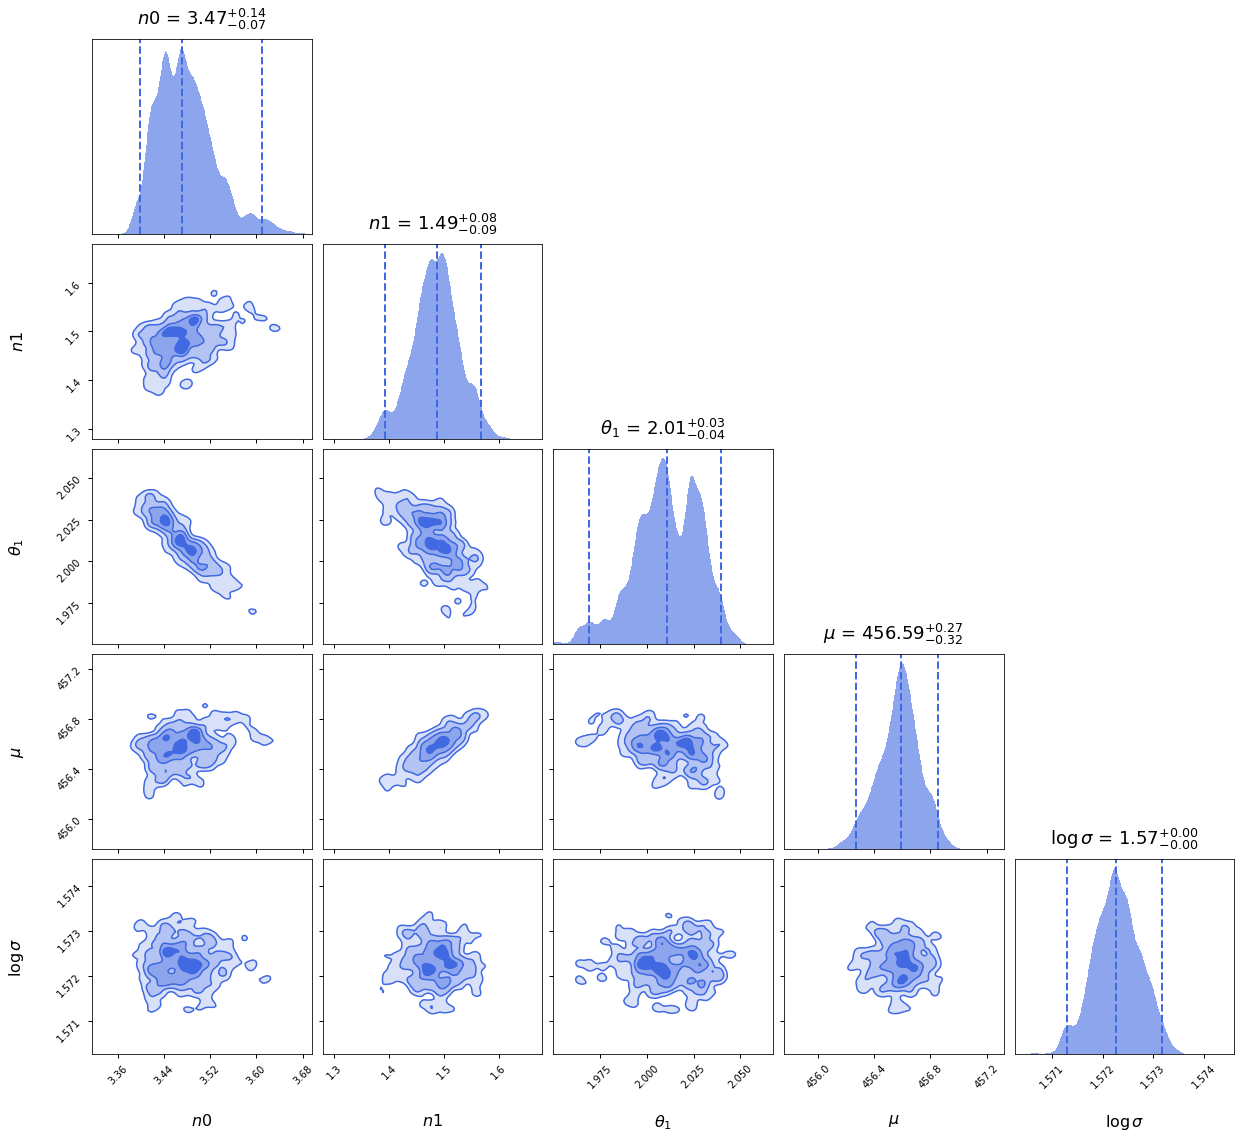

Fitting (mean) :  [  3.478   1.485   2.011 456.577   1.572]
Fitting (median) :  [  3.472   1.487   2.011 456.589   1.572]


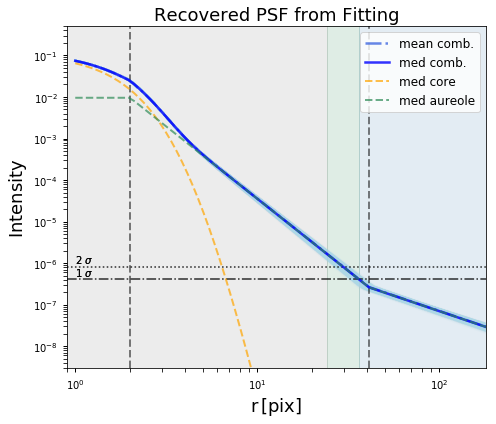

Bakground : 456.59 +/- 37.35
Reduced Chi^2: 0.99974


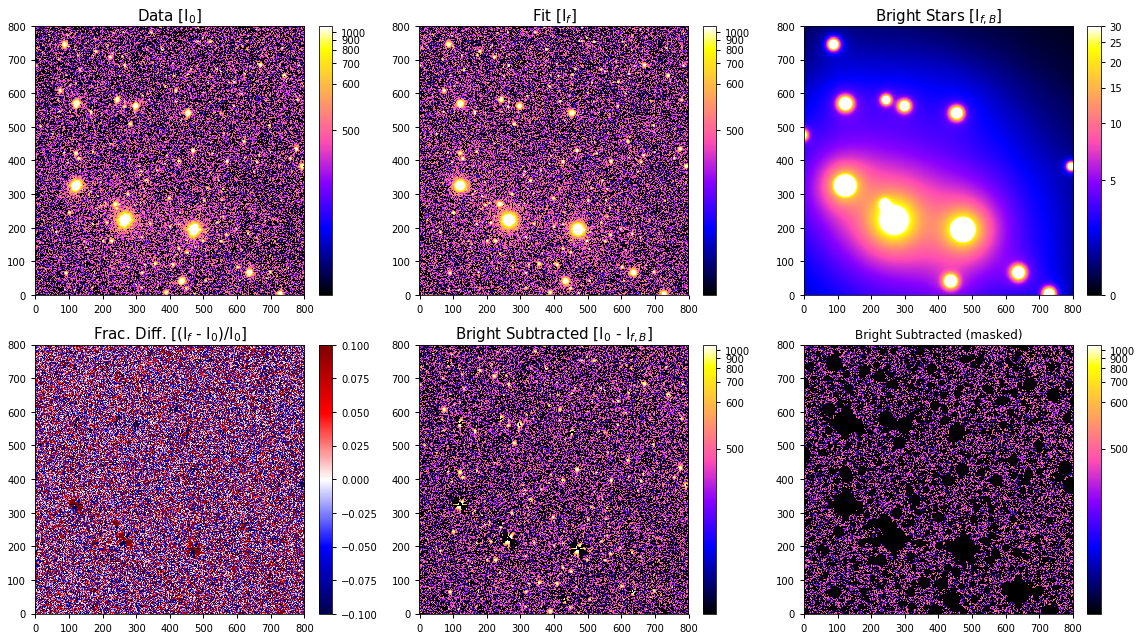

In [9]:
%matplotlib inline
%run -i Run_Fitting.py -f 'G' -n 2 -b '[3100, 1400, 4100, 2400]' -m '[13,11]' -I "./data/2018-05-16-83F010612_30_light_ds_ff_wcs_sms_reg.fits" --DIR_NAME './Frame/2018-05-16-G' --DIR_MEASURE './Frame/2018-05-16-G'